# KDD Hands on tutorial, Barcelona 2024

# An Introduction to Time Series Classification (TSC) and Regression (TSER)

This is the notebook associated with the introduction to the hands-on tutorial on time
series classification and regression. The tutorial website is [here](https://aeon-tutorials.github.io/KDD-2024/) and the structure is
listed [here](https://aeon-tutorials.github.io/KDD-2024/schedule.html). There are ten
 sections, with a separate notebook for each section. The sections are:

1. Introduction to Time Series Classification and Regression (this notebook)
2. [Distance based](./part2_distance_based.ipynb)
3. [Convolution based](./part3_convolution_based.ipynb)
4. [Feature based](./part4_feature_based.ipynb)
5. [Interval based](./part5_interval_based.ipynb)
6. [Dictionary based](./part6_dictionary_based.ipynb)
7. [Deep learning based](./part7_deep_learning_based.ipynb)
8. [Shapelet based](./part8_shapelet_based.ipynb)
9. [Hybrids](./part9_hybrids.ipynb)
10. [Conclusions and future directions](./part10_conclusions.ipynb)


## `aeon` toolkit for TSC and TSER

The tutorial uses the `aeon` toolkit for machine learning from time series data.
`aeon` is a scikit learning compatible toolkit for tsml. It is organised into
modules for different learning tasks: classification, regression, clustering,
forecasting, anomaly detection, segmentation and similarity search. It also has
building block modules for distances, networks and transformations. The tutorial is
concerned with the classification and regression modules. These use collections of
time series to train and test models. `aeon` has a large number of introductory
notebooks available in the [documentation](https://www.aeon-toolkit.org/en/stable/).
We only cover the basics here.


## Data structures and data sets

`aeon` assumes a single time series is a 2D numpy array of shape `(n_channels,
n_timepoints)`. Classifiers and regressors take input collections of time series
(and inherit from `BaseCollectionEstimator`). If the series are all equal length, works
best with 3D numpy shape `(n_cases, n_channels, n_timepoints)`. Unequal length series
 are stored in lists of 2D numpy, but the examples we are going to be equal length.

The tutorial is using EEG data as a working example. The classification data are EEG
readings taken from a subject when at rest or when performing a set task (raising
arms). Full info on this data can be found in the `aeon-neuro` (notebook)[aeon-neuro
link]. Please do not over interpret any results from this data, it is a simple toy
problem to demonstrate functionality.

`aeon` ships with some standard UCR and UEA datasets, and can download them all
directly from timeseriesclassification.com. See this [notebook](https://github.com/aeon-toolkit/aeon-neuro/blob/main/examples/data_loading.ipynb) for details of
the data formatting of this EEG data.

In [3]:
# There are some deprecation warnings present in the notebook, we will ignore them.
# Remove this cell if you are interested in finding out what is changing soon, for
# aeon there will be big changes in out v1.0.0 release!
import warnings

warnings.filterwarnings("ignore")
import numpy as np
from aeon.datasets import load_classification
trainX = np.random.random((20,3, 100)) # Random collection of 20 series, each with 3 channels and 100 timepoints
train_labels = np.random.randint(0, 2, 20) # Random labels
train_target = np.random.random(20) # Random regression target
# load EEG example here

from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier
from aeon.datasets import load_from_tsfile

# Load the univariate EEG TSC dataset as a 3D numpy array
X_train_utsc, y_train_utsc = load_from_tsfile("./data/KDD_UTSC_TRAIN.ts")
X_test_utsc, y_test_utsc = load_from_tsfile("./data/KDD_UTSC_TEST.ts")

print("Single channel EEG TSC problem train shape:", X_train_utsc.shape)
print("Single channel EEG TSC problem test shape:", X_test_utsc.shape)

# Load the univariate EEG TSC dataset as a 3D numpy array
X_train_mtsc, y_train_mtsc = load_from_tsfile("./data/KDD_MTSC_TRAIN.ts")
X_test_mtsc, y_test_mtsc = load_from_tsfile("./data/KDD_MTSC_TEST.ts")

print("Four channel EEG TSC problem train shape:", X_train_mtsc.shape)
print("Single channel EEG TSC problem test shape:", X_test_mtsc.shape)

# Load the univariate EEG TSER dataset as a 3D numpy array
X_train_utser, y_train_utser = load_from_tsfile("./data/KDD_UTSER_TRAIN.ts")
X_test_utser, y_test_utser = load_from_tsfile("./data/KDD_UTSER_TEST.ts")

print("Single channel EEG TSER problem train shape:", X_train_utsc.shape)
print("Single channel EEG TSER problem test shape:", X_test_utsc.shape)

# Load the univariate EEG TSER dataset as a 3D numpy array
X_train_mtser, y_train_mtser = load_from_tsfile("./data/KDD_MTSER_TRAIN.ts")
X_test_mtser, y_test_mtser = load_from_tsfile("./data/KDD_MTSER_TEST.ts")

print("Four channel EEG TSER problem train shape:", X_train_mtser.shape)
print("Single channel EEG TSER problem test shape:", X_test_mtser.shape)


Single channel EEG TSC problem train shape: (40, 1, 100)
Single channel EEG TSC problem test shape: (40, 1, 100)
Four channel EEG TSC problem train shape: (40, 4, 100)
Single channel EEG TSC problem test shape: (40, 4, 100)
Single channel EEG TSER problem train shape: (40, 1, 100)
Single channel EEG TSER problem test shape: (40, 1, 100)
Four channel EEG  TSER problem train shape: (72, 4, 100)
Single channel EEG  TSER problem test shape: (72, 4, 100)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

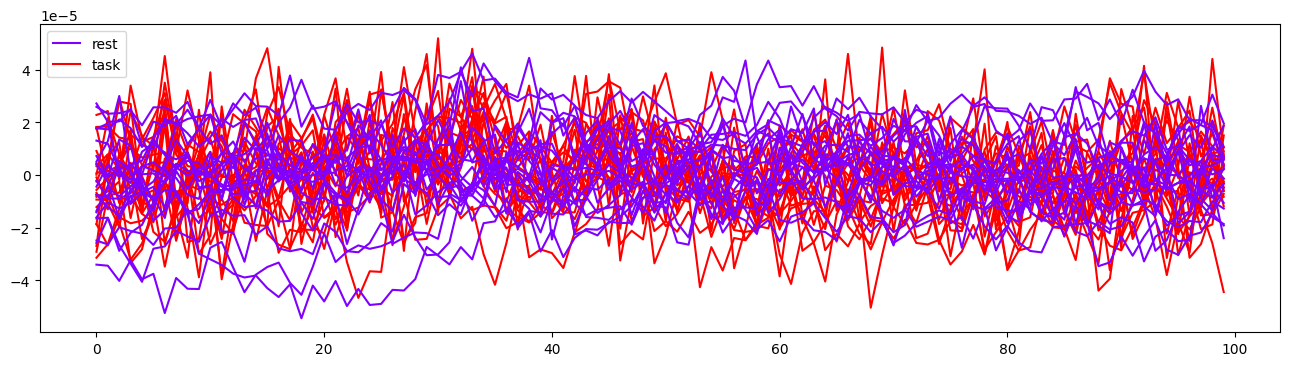

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from aeon.visualisation.series._collections import plot_series_collection

plot_series_collection(X_train_utsc, y_train_utsc)

## Classification and Regression basic use case

`aeon` classifiers and regressors work in the same way as scikit-learn. They have
`fit` and `predict` methods. We use the Rocket classifier and regressor as a simple example.
These are explained in detail in the [convolution notebook](Part 3 convolution based.ipynb).



In [9]:
from aeon.classification.convolution_based import RocketClassifier
from aeon.regression.convolution_based import RocketRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
rc = RocketClassifier(rocket_transform="minirocket")
rc.fit(X_train_utsc, y_train_utsc)
pred1 = rc.predict(X_test_utsc)

rr = RocketRegressor(rocket_transform="minirocket")
rr.fit(X_train_utser, y_train_utser)
pred2 = rr.predict(X_test_utser)
print("Rocket classifier accuracy:", accuracy_score(y_test_utsc, pred1))
print("Rocket regressor MSE:", mean_squared_error(y_test_utser, pred2))

Rocket classifier accuracy: 0.775
Rocket regressor MSE: 0.9007935852621447


## sklearn like classification and regression

`aeon` classifiers and regressors can be used in pipelines and tuned with, for example,
scikit gridsearch. Here is an example where we convert the data into autoregressive
terms and construct the Rocket classifier on this data.


In [17]:
from aeon.transformations.collection import AutocorrelationFunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(AutocorrelationFunctionTransformer(n_lags=25), RocketClassifier
(rocket_transform="minirocket"))
param_grid = {'rocketclassifier__num_kernels': [5000, 10000, 15000]}
grid = GridSearchCV(pipe, param_grid, cv=3)
grid.fit(X_train_utsc, y_train_utsc)
print(grid.best_params_)
preds = grid.predict(X_test_utsc)
print("Rocket classifier accuracy:", accuracy_score(y_test_utsc, preds))

{'rocketclassifier__num_kernels': 5000}
Rocket classifier accuracy: 0.475


## Further info

There is a lot of information avaiable in th `aeon` documentation.

[classification notebook](https://www.aeon-toolkit.org/en/stable/examples/classification/classification.html)
[classification examples](https://www.aeon-toolkit.org/en/stable/examples.html)
[Regression notebook](https://www.aeon-toolkit.org/en/stable/examples/regression/regression.html)

You can get results published in bake offs directly using aeon.

[Getting published results directly](https://www.aeon-toolkit.org/en/stable/examples/benchmarking/bakeoff_results.html)

More info on benchmarking

[benchmarking](https://www.aeon-toolkit.org/en/stable/examples/benchmarking/benchmarking.html)

If you find anything wrong or unclear in the aeon documentation, please raise an
issue on github, we welcome new contributors.




